# Python Implementation of Decision Trees

You will be using the heart disease dataset provided to predict whether a person has heart disease or not using Decision Trees.

In the following sections, we'll:
1. clean and prepare the data,
2. build a decision tree with default hyperparameters,
3. understand all the hyperparameters that we can tune, and finally
4. choose the optimal hyperparameters using grid search cross-validation.

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np

# Load the data

In [4]:
# Read the data into a dataframe
df = pd.read_csv('C:/Users/Dell/Downloads/heart_disease_case_study.csv', sep=';')
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [5]:
# View the data
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [6]:
# View shape of data
df.shape

(70000, 13)

In [7]:
# View the columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
# View the statistics of data
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [9]:
# View the count of patients have heart diseaese
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
# Assign the output column
y = df['cardio']

In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [12]:
# Assign the input features
x = df.drop('cardio', axis = 1)

In [13]:
# View the features
x

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       0  
...      ...   ...     ...  
69995      1     0       1  
69996      0     0       1  
69997      0     1       0  
69998      0     0       0  
69999      0     0       1  

[70000 rows x 12 columns]

## Train a simple Decision tree model

In [14]:
# load sklearn libraries required to construct a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [15]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [16]:
# View the shape of training data
x_train.shape

(56000, 12)

In [17]:
# View the shape of test data
x_test.shape

(14000, 12)

In [18]:
x.shape

(70000, 12)

In [19]:
dt_basic = DecisionTreeClassifier()

In [20]:
dt_basic

DecisionTreeClassifier()

# Decision Tree

In [41]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)

In [42]:
# View the attributes of tree created
dt_basic

DecisionTreeClassifier(max_depth=10)

In [43]:
# Fit the training data
dt_basic.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [44]:
# Predict based on test data
y_preds = dt_basic.predict(x_test)

In [45]:
# View the predictions
y_preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
y_test

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

# Accuracy

In [47]:
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test, y_preds)

In [48]:
# View the accuracy
accuracy_value

0.7256428571428571

# Confusion Matrix 

In [49]:
# Create and print confusion matrix
confusion_matrix(y_test, y_preds)

array([[5600, 1469],
       [2372, 4559]], dtype=int64)

In [50]:
# Print the confusion matrix
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7069
           1       0.76      0.66      0.70      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.73      0.72     14000



In [51]:
# Calculate the number of nodes in the tree
dt_basic.tree_.node_count

1155

## Visualize the Tree

In [52]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [53]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [56]:
#Select input columns as features
features = list(x.columns[0:])

In [57]:
#View the features
features

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [58]:
#Visualise the tree using the following steps:
dot_data = StringIO()  
export_graphviz(dt_basic, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.446752 to fit



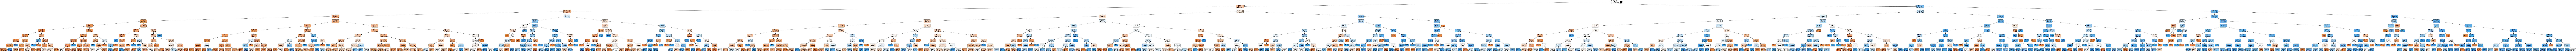

In [59]:
Image(graph.create_png())

## Hyperparamter Tuning Optimization 

### Max_depth

In [60]:
#Choose and mention the hyperparameter
parameters = {'max_depth': range(1,10)}

In [61]:
parameters

{'max_depth': range(1, 10)}

In [62]:
#You can define number of folds for cross-validation as follows:
n_folds = 5

In [64]:
#Build a Decision Tree
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [65]:
dtree

DecisionTreeClassifier(random_state=0)

In [66]:
#Import the required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [68]:
#Use GridSearchCV to buid a tree
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score = True)

In [69]:
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [70]:
#Fit the training data
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [71]:
#View the score
scores = tree.cv_results_

In [72]:
scores

{'mean_fit_time': array([0.02414041, 0.03649549, 0.05015354, 0.07040567, 0.08538585,
        0.09535952, 0.10631013, 0.11987138, 0.13045688]),
 'std_fit_time': array([0.00147503, 0.00049499, 0.00088366, 0.00488148, 0.00531255,
        0.00475691, 0.00206603, 0.00349587, 0.00039971]),
 'mean_score_time': array([0.00258341, 0.0023953 , 0.00280609, 0.00337696, 0.0031827 ,
        0.00358701, 0.00299053, 0.0036036 , 0.00298958]),
 'std_score_time': array([5.09476987e-04, 4.90800952e-04, 4.10053469e-04, 7.87256719e-04,
        4.02396332e-04, 4.88242762e-04, 1.97098204e-05, 7.96295020e-04,
        2.92546494e-06]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_d

In [73]:
# Plot accuracy vs param_max_depth
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.024140      0.001475         0.002583        0.000509   
1       0.036495      0.000495         0.002395        0.000491   
2       0.050154      0.000884         0.002806        0.000410   
3       0.070406      0.004881         0.003377        0.000787   
4       0.085386      0.005313         0.003183        0.000402   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.711607           0.718839   
1               2  {'max_depth': 2}           0.711607           0.718839   
2               3  {'max_depth': 3}           0.724375           0.731071   
3               4  {'max_depth': 4}           0.730625           0.731161   
4               5  {'max_depth': 5}           0.727679           0.734464   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.708661           0.711875  ...         0.713946        0.004116   
1           0.708661           0.711875  ...         0.713946        0.004116   
2           0.719554           0.726696  ...         0.725875        0.003825   
3           0.724911           0.727589  ...         0.729250        0.002627   
4           0.726696           0.727500  ...         0.729786        0.003129   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.714531            0.712723   
1                8            0.714531            0.712723   
2                7            0.726250            0.724576   
3                3            0.731830            0.729688   
4                2            0.733080            0.733371   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.715268            0.714464            0.712746   
1            0.715268            0.714464            0.712746   
2            0.727455            0.725670            0.725424   
3            0.732098            0.730402            0.729308   
4            0.735558            0.735558            0.733080   

   mean_train_score  std_train_score  
0          0.713946         0.001029  
1          0.713946         0.001029  
2          0.725875         0.000956  
3          0.730665         0.001121  
4          0.734129         0.001171  

[5 rows x 21 columns]

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

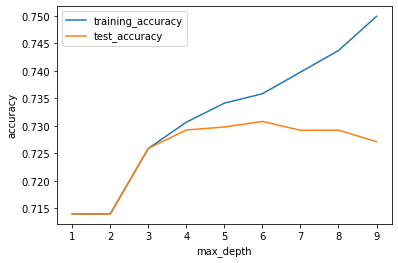

In [76]:
plt.figure
plt.plot(scores["param_max_depth"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [77]:
tree.best_params_

{'max_depth': 6}

### Min_samples_leaf

In [78]:
# Choose and mention the hyperparameter
parameters = {'min_samples_leaf': range(10,200,20)}

In [80]:
parameters

{'min_samples_leaf': range(10, 200, 20)}

In [81]:
n_folds = 5

In [82]:
# Build a Decision Tree
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [83]:
dtree

DecisionTreeClassifier(random_state=0)

In [84]:
# Build the treeecd c
tree2= GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)

In [85]:
# Fit the training data
tree2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(10, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [86]:
scores2 = tree2.cv_results_

In [87]:
scores2

{'mean_fit_time': array([0.23995795, 0.19368839, 0.17233167, 0.16356635, 0.15936699,
        0.15378914, 0.14700775, 0.15398741, 0.15219975, 0.14780455]),
 'std_fit_time': array([0.00930493, 0.00323866, 0.00278139, 0.00275038, 0.00271052,
        0.00238094, 0.00241089, 0.02432089, 0.01074392, 0.00336195]),
 'mean_score_time': array([0.00478721, 0.00398388, 0.0039957 , 0.00319309, 0.00339069,
        0.00339713, 0.00338387, 0.00379229, 0.00378332, 0.0035902 ]),
 'std_score_time': array([3.98874297e-04, 1.30496662e-05, 6.34338918e-04, 3.96887536e-04,
        4.88792014e-04, 4.82109311e-04, 4.94621440e-04, 1.16188772e-03,
        3.96226964e-04, 4.88207777e-04]),
 'param_min_samples_leaf': masked_array(data=[10, 30, 50, 70, 90, 110, 130, 150, 170, 190],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 10},
  {'min_samples_leaf': 30},
  {'min_s

In [88]:
pd.DataFrame(scores2).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.239958      0.009305         0.004787        0.000399   
1       0.193688      0.003239         0.003984        0.000013   
2       0.172332      0.002781         0.003996        0.000634   
3       0.163566      0.002750         0.003193        0.000397   
4       0.159367      0.002711         0.003391        0.000489   

  param_min_samples_leaf                    params  split0_test_score  \
0                     10  {'min_samples_leaf': 10}           0.684107   
1                     30  {'min_samples_leaf': 30}           0.719911   
2                     50  {'min_samples_leaf': 50}           0.723661   
3                     70  {'min_samples_leaf': 70}           0.724821   
4                     90  {'min_samples_leaf': 90}           0.729107   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.680268           0.683125           0.675804  ...   
1           0.720000           0.716339           0.714375  ...   
2           0.727232           0.723214           0.723304  ...   
3           0.730179           0.721786           0.728304  ...   
4           0.733661           0.722054           0.729286  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.679500        0.003918               10            0.803839   
1         0.716857        0.002678                9            0.759665   
2         0.724571        0.001557                8            0.750915   
3         0.725911        0.002974                7            0.746071   
4         0.728625        0.003725                6            0.744040   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.803080            0.802210            0.804554   
1            0.760112            0.759978            0.761228   
2            0.750379            0.751138            0.751652   
3            0.746607            0.747299            0.748705   
4            0.743571            0.745313            0.745335   

   split4_train_score  mean_train_score  std_train_score  
0            0.802813          0.803299         0.000817  
1            0.760335          0.760263         0.000529  
2            0.752009          0.751219         0.000568  
3            0.746652          0.747067         0.000907  
4            0.743259          0.744304         0.000869  

[5 rows x 21 columns]

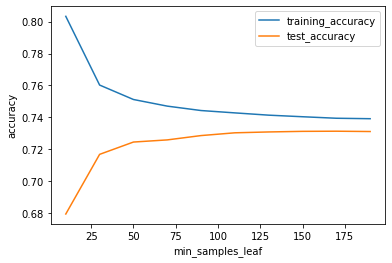

In [90]:
# Plot accuracy vs param_min_samples_leaf
plt.figure
plt.plot(scores2["param_min_samples_leaf"].data,scores2["mean_train_score"],label="training_accuracy")
plt.plot(scores2["param_min_samples_leaf"].data, scores2["mean_test_score"], label="test_accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [91]:
tree2.best_params_

{'min_samples_leaf': 170}

# Multiple parameters

In [93]:
# Create a Parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150,50),
    'criterion': ['gini','entropy']
}

In [ ]:
n_folds= 5

In [94]:
# Create a Decision Tree
dtree= DecisionTreeClassifier()

In [95]:
dtree

DecisionTreeClassifier()

In [102]:
# Create a Grid with parameters
grid = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs=-1, return_train_score=True)

In [103]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [104]:
grid.cv_results_

{'mean_fit_time': array([0.19069004, 0.22251277, 0.21692724, 0.21103568, 0.4498198 ,
        0.41132536, 0.41083322, 0.37771983, 0.27318301, 0.27238564,
        0.2568243 , 0.26181545, 0.49699984, 0.44174128, 0.37080512,
        0.34016681]),
 'std_fit_time': array([0.02363795, 0.0216971 , 0.01318008, 0.01350814, 0.09664405,
        0.05172089, 0.06692189, 0.03865384, 0.04695347, 0.0416839 ,
        0.02680774, 0.01218756, 0.06464594, 0.06979916, 0.01335797,
        0.01514048]),
 'mean_score_time': array([0.00698152, 0.00658212, 0.00638256, 0.00698123, 0.00748439,
        0.00738153, 0.00598383, 0.00778055, 0.00927944, 0.01196718,
        0.00808072, 0.00558357, 0.00698133, 0.00668554, 0.00538559,
        0.0051733 ]),
 'std_score_time': array([2.09205573e-03, 1.01678524e-03, 4.87664152e-04, 2.27374512e-03,
        1.72154460e-03, 4.89610501e-04, 8.39558452e-07, 2.47447140e-03,
        5.47383751e-03, 8.57948509e-03, 7.96042240e-04, 4.87786616e-04,
        1.09236233e-03, 8.73912254e-

In [105]:
pd.DataFrame(grid.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.190690      0.023638         0.006982        0.002092   
1       0.222513      0.021697         0.006582        0.001017   
2       0.216927      0.013180         0.006383        0.000488   
3       0.211036      0.013508         0.006981        0.002274   
4       0.449820      0.096644         0.007484        0.001722   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     50   
1            gini               5                     50   
2            gini               5                    100   
3            gini               5                    100   
4            gini              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
3                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
4                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.728036  ...         0.729946        0.003080                9   
1           0.728036  ...         0.729946        0.003080                9   
2           0.728036  ...         0.729875        0.003211               11   
3           0.728036  ...         0.729875        0.003211               11   
4           0.730357  ...         0.729393        0.001763               15   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.732679            0.733147            0.735290   
1            0.732679            0.733147            0.735290   
2            0.732679            0.732991            0.735268   
3            0.732679            0.732991            0.735268   
4            0.744062            0.744263            0.744487   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.735246            0.732790          0.733830         0.001184  
1            0.735246            0.732790          0.733830         0.001184  
2            0.735246            0.733103          0.733857         0.001151  
3            0.735246            0.733103          0.733857         0.001151  
4            0.745246            0.744554          0.744522         0.000401  

[5 rows x 24 columns]

In [106]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [107]:
grid.best_score_

0.7314107142857142

In [108]:
best_grid = grid.best_estimator_

In [109]:
best_grid

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [110]:
best_grid.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [111]:
best_grid.score(x_test, y_test)

0.7281428571428571

In [112]:
dot_data = StringIO()  
export_graphviz(best_grid, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

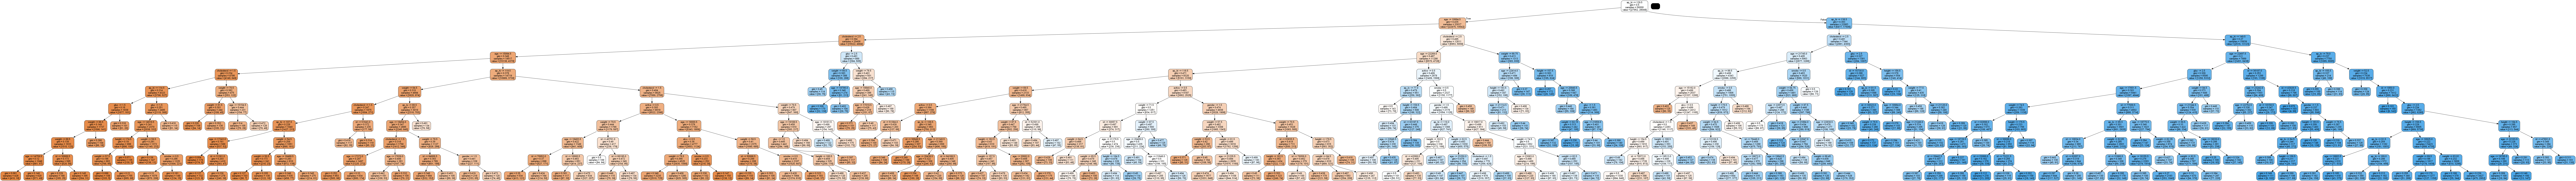

In [113]:
Image(graph.create_png())

In [ ]:
# Visualise the tree

## Create a less complex tree easy to visualize

In [114]:
# Create a Tree
dtree_less_complex = DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, min_samples_split=50)

In [115]:
dtree_less_complex.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, min_samples_split=50)

In [118]:
dot_data = StringIO()  
export_graphviz(dtree_less_complex, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

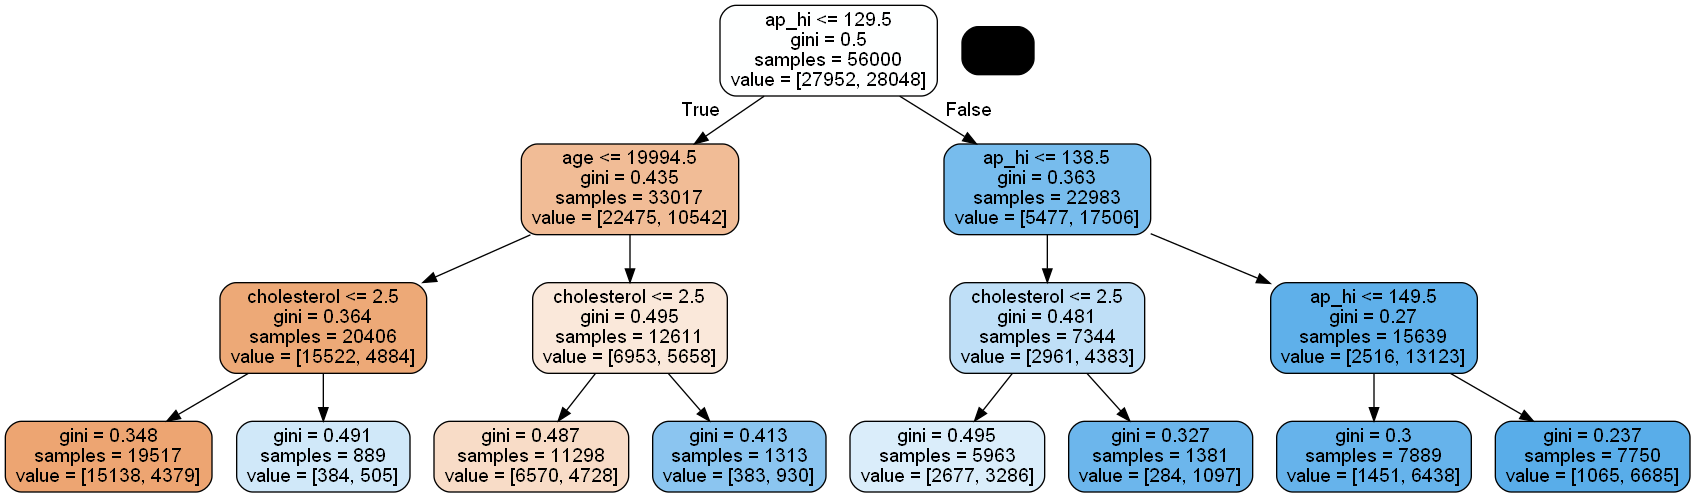

In [119]:
Image(graph.create_png())

In [ ]:
# Visualise the Tree

In [120]:
# View the accuracy score
dtree_less_complex.score(x_test, y_test)

0.7254285714285714